In [1505]:
import pandas as pd
from math import sqrt
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [1498]:
# data = pd.read_csv('/Volumes/Li/taxi/Taxi_Trips.csv')

In [1499]:
# chunksize = 10 ** 10
# for chunk in pd.read_csv('/Volumes/Li/taxi/Taxi_Trips.csv', chunksize=chunksize):
#     process(chunk)

In [1501]:
with open('/Volumes/Li/taxi/Taxi_Trips.csv') as f:
    data = pd.read_csv(f, nrows=10 ** 5, engine='python')

In [1502]:
data = data.loc[data['Trip Miles'].between(1, 100)]
data

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,abs_lat_diff,abs_lon_diff,Trip_Total_log
2,b74e446c9053c94c6ef33334ad01629e7b220459,f8d3b9a91df83387f39b14924f52dc76b879eb5c27ea76...,06/04/2019 06:30:00 AM,06/04/2019 07:00:00 AM,1680.0,17.90,1.703198e+10,1.703132e+10,76.0,32.0,...,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),0.094084,0.282047,4.064744
7,b76121258a5829067f5b6ce7748592442fb1f2cc,eb28d07387c3612fea25a09e2da7ab39cca20e63543889...,06/01/2019 01:30:00 PM,06/01/2019 01:45:00 PM,864.0,2.30,1.703133e+10,1.703108e+10,33.0,8.0,...,Taxi Affiliation Service Yellow,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),0.033158,0.008857,2.420368
11,b7545a556fc7750b9ea5ea737c01d7bd2ee5197a,16d6cdedd3ad81605ff75fe12cda01cc8efc82667a6663...,06/20/2019 07:30:00 PM,06/20/2019 08:15:00 PM,2215.0,13.76,1.703198e+10,1.703106e+10,76.0,6.0,...,Flash Cab,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.945282,-87.661545,POINT (-87.6615450961 41.9452823311),0.033788,0.241495,3.877432
15,b75dc493a89749a6d04c79be8f801887072960fd,251e9084ed2d4c90b4f113a866888186d09b852de84937...,06/27/2019 07:15:00 PM,06/27/2019 07:15:00 PM,456.0,1.20,1.703108e+10,1.703108e+10,8.0,8.0,...,City Service,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),41.897984,-87.641492,POINT (-87.6414915334 41.897983898),0.000348,0.020729,1.981001
16,b75b55be2b4d993076ed73b3077723fd1adab637,1ada1b0db4c89ff798c9c99c02166793001d4a68c2a97c...,06/05/2019 02:15:00 PM,06/05/2019 02:15:00 PM,529.0,1.70,1.703184e+10,1.703108e+10,32.0,8.0,...,Taxi Affiliation Service Yellow,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),0.026497,0.003014,2.327278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,c664d8a1151426b0583b3fe024d13efed37d737f,d645a947dabd328acad2dd5987f9714e3a79807204ce1f...,06/13/2019 05:30:00 PM,06/13/2019 06:00:00 PM,1260.0,3.10,1.703184e+10,1.703107e+10,32.0,7.0,...,Star North Management LLC,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.922083,-87.634156,POINT (-87.6341560931 41.922082541),0.041088,0.001410,2.724580
99992,c65bbcaef353711296bb8020d537de2d6ac6d5e2,0445183a107050077824c5eac5c05bf30a5e0c3b7649f7...,06/25/2019 09:45:00 PM,06/25/2019 10:00:00 PM,840.0,2.70,1.703108e+10,1.703184e+10,8.0,33.0,...,Taxi Affiliation Services,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.849247,-87.624135,POINT (-87.6241352979 41.8492467545),0.043261,0.002080,2.505526
99994,c655b7aa86b594f4b0e778f1f56a08b539c6102c,fad72c90f3e876bd026bba64daff268cad313987704140...,06/03/2019 12:15:00 PM,06/03/2019 12:45:00 PM,2040.0,17.40,1.703198e+10,1.703108e+10,76.0,8.0,...,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),0.087029,0.271176,4.050044
99998,c66163af6e26f80c806ffd9415887d8e6640086d,c0910b0d86dc225791e3a4eaf41b3dd05ccc3855ce6a41...,06/28/2019 01:00:00 PM,06/28/2019 01:15:00 PM,1020.0,2.10,1.703128e+10,1.703108e+10,28.0,8.0,...,Top Cab Affiliation,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.891972,-87.612945,POINT (-87.6129454143 41.8919715078),0.006671,0.029863,2.463853


In [1503]:
data.to_csv('/Users/zhili/Desktop/trip_data.csv')

In [1450]:
data.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location', 'abs_lat_diff', 'abs_lon_diff',
       'Trip_Total_log'],
      dtype='object')

In [1451]:
data['Trip Miles']

2        17.90
7         2.30
11       13.76
15        1.20
16        1.70
         ...  
99986     3.10
99992     2.70
99994    17.40
99998     2.10
99999     1.70
Name: Trip Miles, Length: 32351, dtype: float64

In [1452]:
# Absolute difference in latitude and longitude

data['abs_lat_diff']= (data['Dropoff Centroid Latitude']- data['Pickup Centroid Latitude']).abs()

data['abs_lon_diff']= (data['Dropoff Centroid Longitude']- data['Pickup Centroid Longitude']).abs()

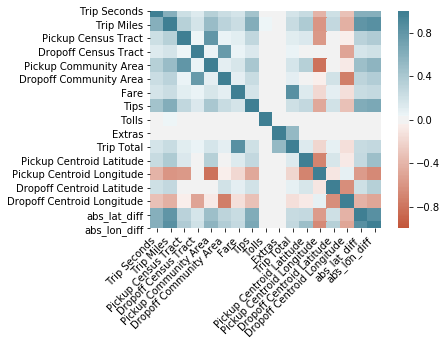

In [1187]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## From above heat map, we can conclude that Trip miles has strongest correlation with Trip total

In [1189]:
#Numerical and Categorical features
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

Number of Numerical features:  17


In [1190]:
categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Categorical features:  8


In [1192]:
data.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location', 'abs_lat_diff', 'abs_lon_diff'],
      dtype='object')

In [1248]:
data= data.loc[data['Trip Miles'].between(1, 100)]

As we see, the target variable SalePrice is not normally distributed.
This can reduce the performance of the ML regression models because some assume normal distribution,
Therfore we make a log transformation, the resulting distribution looks much better.

## EDA

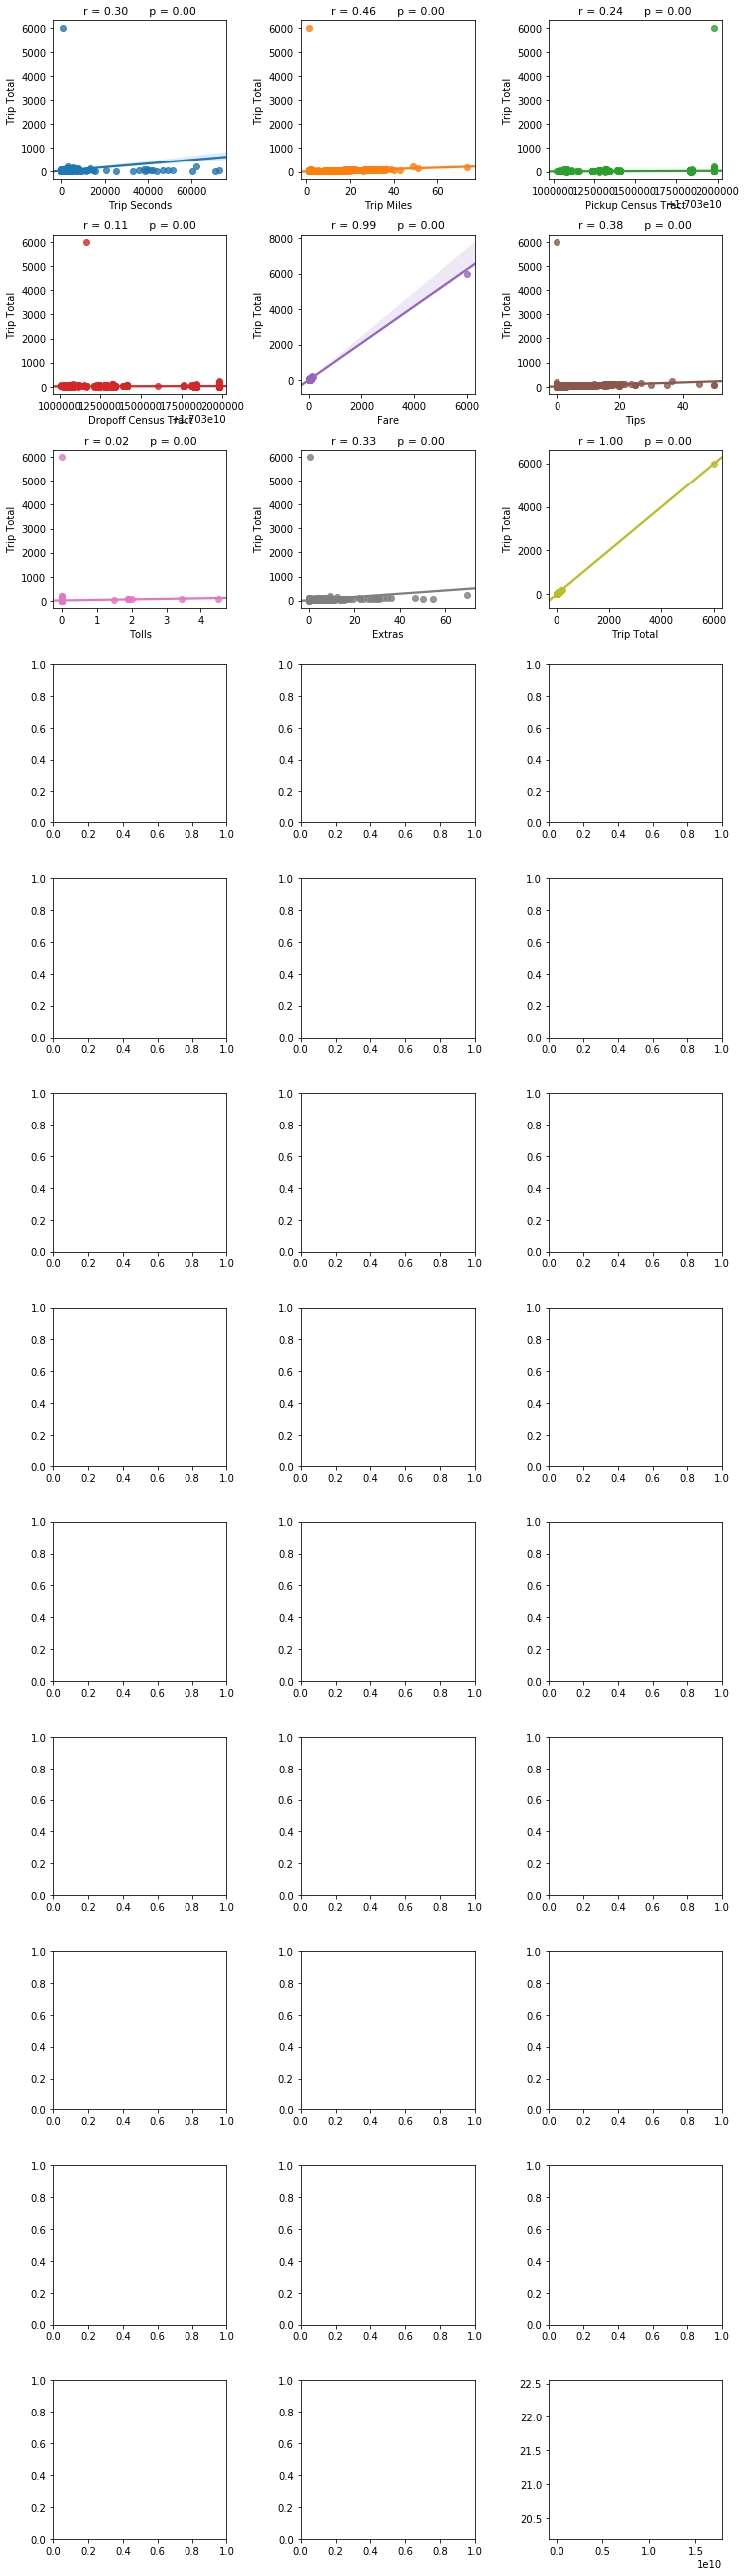

In [1249]:
from scipy import stats
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
# li_not_plot = ['Trip ID', 'SalePrice', 'SalePrice_Log']
li_plot = ['Trip Seconds', 'Trip Miles', 'Pickup Census Tract', 
           'Dropoff Census Tract', 'Fare','Tips', 'Tolls', 'Extras', 'Trip Total']
li_plot_num_feats = [c for c in list(numerical_feats) if c in li_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(data[li_plot_num_feats[i]], data['Trip Total'], ax = axs[r][c])
            stp = stats.pearsonr(data[li_plot_num_feats[i]], data['Trip Total'])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

## From above, we further convinced that Trip Seconds, Trip Miles, fare are tightly correlated to Trip total

In [1453]:
data.columns
data= data.loc[data['Trip Miles'].between(1, 100)]
data.shape

(32351, 26)

In [1454]:
data['Pickup Census Tract']

2        1.703198e+10
7        1.703133e+10
11       1.703198e+10
15       1.703108e+10
16       1.703184e+10
             ...     
99986    1.703184e+10
99992    1.703108e+10
99994    1.703198e+10
99998    1.703128e+10
99999    1.703184e+10
Name: Pickup Census Tract, Length: 32351, dtype: float64

In [1456]:
data['Extras']
data['Fare']
data['Trip Miles']

2        17.90
7         2.30
11       13.76
15        1.20
16        1.70
         ...  
99986     3.10
99992     2.70
99994    17.40
99998     2.10
99999     1.70
Name: Trip Miles, Length: 32351, dtype: float64

In [1457]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

In [1460]:
X = data[['Trip Seconds', 'Trip Miles']]
Y = data['Trip Total']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train
X_test
# y_test

,Trip Seconds,Trip Miles
99430,960.0,3.20
33945,3180.0,17.10
77045,3780.0,17.00
40518,490.0,1.26
39937,720.0,3.70
...,...,...
21777,588.0,1.81
26655,1042.0,2.95
62082,480.0,1.30
12687,376.0,1.15


## If the number of estimators is changed to 10, the results are as follows:

In [1461]:
data[['Trip Seconds', 'Trip Total', 'Trip Miles']]

,Trip Seconds,Trip Total,Trip Miles
2,1680.0,58.25,17.90
7,864.0,11.25,2.30
11,2215.0,48.30,13.76
15,456.0,7.25,1.20
16,529.0,10.25,1.70
...,...,...,...
99986,1260.0,15.25,3.10
99992,840.0,12.25,2.70
99994,2040.0,57.40,17.40
99998,1020.0,11.75,2.10


In [1488]:
data['Trip Seconds'].mean()

1194.1952026212482

In [1489]:
data['Trip Seconds'].std() 

1483.5330369509122

In [1491]:
data['Trip Miles'].mean()

5.225666903650711

In [1492]:
data['Trip Miles'].std()

6.382840078515227

In [1490]:
X_train

array([[-0.32168358, -0.53949148],
       [ 1.67651835,  2.01311207],
       [-0.39058709, -0.66400873],
       ...,
       [-0.58559704, -0.66400873],
       [-0.14292446, -0.28578759],
       [-0.11757317, -0.44610354]])

In [1463]:
ss5 = StandardScaler()
X_train = ss5.fit_transform(X_train)
X_test = ss5.transform(X_test)
X_train
X_test

array([[-0.15657515, -0.3215863 ],
       [ 1.28649846,  1.84190086],
       [ 1.67651835,  1.8263362 ],
       ...,
       [-0.46859107, -0.61731476],
       [-0.53619452, -0.64066174],
       [-0.54659505, -0.63287941]])

In [1486]:
X_train

array([[-0.32168358, -0.53949148],
       [ 1.67651835,  2.01311207],
       [-0.39058709, -0.66400873],
       ...,
       [-0.58559704, -0.66400873],
       [-0.14292446, -0.28578759],
       [-0.11757317, -0.44610354]])

In [1487]:
# ss3 = StandardScaler()
# X_train = ss3.fit_transform(X_train)
# X_test = ss3.transform(X_test)

regr2 = linear_model.LinearRegression()
regr2.fit(X_train, y_train)
print(regr.coef_)
print(regr.intercept_)

# X_test_random = ss2.transform([[270,2.25]])
# X_test_random
# y_test_random = regr.predict(X_test_random)
# y_test_random


[ 1.99052501 16.6702642 ]
21.275995363214843


In [1474]:
X_test = ss5.transform(X_test)
X_test

array([[-0.78111474, -0.97036804],
       [-0.78111474, -0.96909831],
       [-0.78111474, -0.96910744],
       ...,
       [-0.78111474, -0.9705416 ],
       [-0.78111474, -0.9705553 ],
       [-0.78111474, -0.97055074]])

In [1496]:
X_test_random2 = ss5.transform([[270, 2.25]])

X_test_random2
y_test_random = regr2.predict(X_test_random2)
y_test_random

array([12.24566827])